In [1]:
!pip install pystan
# GP 5 yo Bayesian analysis library

    100% |████████████████████████████████| 34.6MB 25kB/s eta 0:00:011    49% |████████████████                | 17.3MB 11.3MB/s eta 0:00:02


In [2]:
!pip install fbprophet
# FB Prophet - meant to operate at scale, so very quick!

  Running setup.py bdist_wheel for fbprophet ... - \ | / - \ done
  Stored in directory: /Users/sfdcapacmarketing/Library/Caches/pip/wheels/43/f2/6c/5ed49d64b0aab1affc668d4555481db950fc4cc51658198951
Successfully built fbprophet


In [3]:
# Import libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
# Read in data
df = pd.read_csv('../../data/example_wp_peyton_manning.csv') 
# Wikipedia traffic for Peyton Manning
df['y'] = np.log(df['y']) # Nice example of a log transform
df.head()

# Note that in practice date formats are really important.
# Missing data is also a key issue in some models
# SOME OPTIONS - linear interpolation, zeros

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
# Fit a time series model
m = Prophet()
m.fit(df);

In [6]:
# Predict future time series
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
# Attach predicted values - yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Create a confidence interval to assess stability over time...

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200900,7.512928,8.926121
3266,2017-01-16,8.525905,7.755196,9.236002
3267,2017-01-17,8.313265,7.577697,9.035211
3268,2017-01-18,8.145861,7.455130,8.886194
3269,2017-01-19,8.157749,7.455620,8.875080


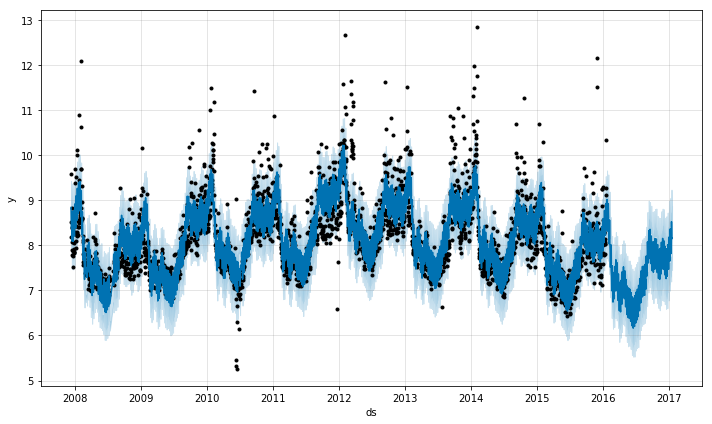

In [8]:
# Plot the forecasted values
from matplotlib import pyplot as plt
%matplotlib inline

m.plot(forecast);
# Visual inspection - fairly stable, doesn't seem to be trending
# Dark blue is the point prediction, shaded blue line is the confidence
# interval, black dot is observation. 
# At times the model under-estimates significantly - may need to
# introduce alphas or other factors.

# Evaluation? Write your own, refer to R - Scaled error is the goal.

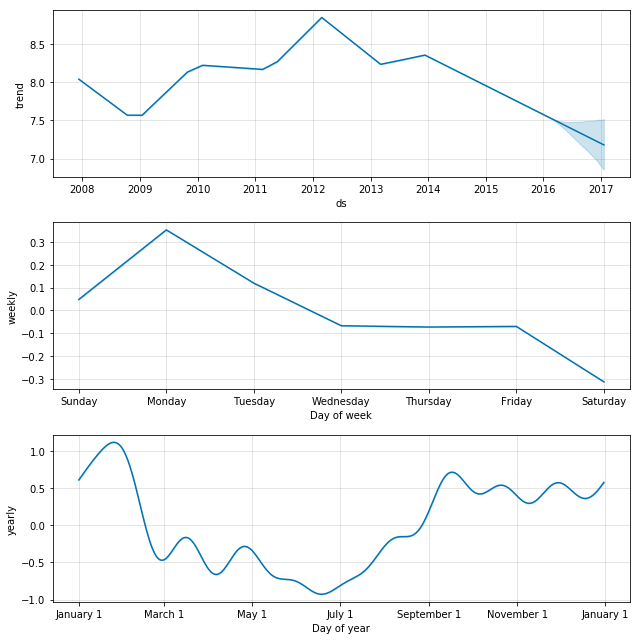

In [9]:
# Time Series Decomposition
m.plot_components(forecast);
# Very nice decomposition. Weekly - Monday night football
# STAN is a general additive model - tries to explain as much variation
# as possible at each level of the breakdown - i.e. month, then year, then day.
# Bit different on R. 